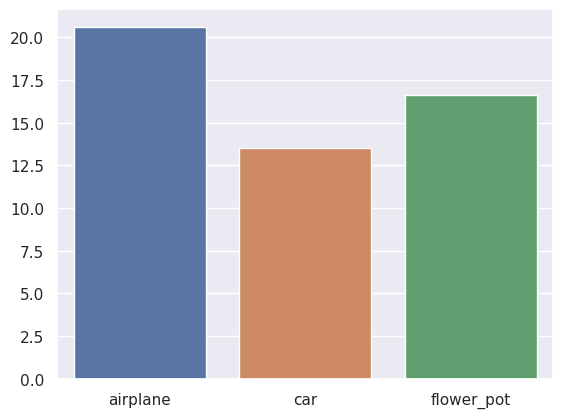

In [3]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

with open("./statistic/airplane_car_flowerpot.json", 'r') as f:
    sdict = json.load(f)

class_sets = ["airplane", "car", "flower_pot"]

correct_ratio = []
gdth_ratios = []
err_rs = []
err_ts = []
err_xs = []
for cls in class_sets:
    gdth_ratios.append((np.array(sdict[cls]["gdth_set"]) / np.array(sdict[cls]["init_set"])).mean().item())
    correct_ratio.append(len(sdict[cls]["corr_set"]) / sdict[cls]["totl_cnt"])
    
    err_r = [r if r < 90.0 else 180.0 - r for r in sdict[cls]["err_R"]]
    err_rs.append(np.mean(err_r).item())
    err_ts.append(np.absolute(np.mean(sdict[cls]["err_t"])).item())
    err_x = [x if x < 90.0 else 180.0 - x for x in sdict[cls]["err_x"]]
    err_xs.append(np.mean(err_x).item())

sns.barplot(x=class_sets, y=err_xs)
# sns.barplot(x=class_sets, y=err_Rs)
plt.show()


In [2]:
import utils
import numpy as np

pcd = utils.ply2npy("/home/hm/fuguiduo/datasets/modelnet40/ply/airplane/airplane_0001.ply")
pcd = np.concatenate((pcd[:,0:3], np.random.random(size=(len(pcd), 3)) * 255.0, pcd[:,3:6]), axis=1)
utils.dump1frag(pcd, ply_vertex_type=utils.make_ply_vtx_type(True, True), out_dir=".", out_name="noise_test_origin.ply")

pcd = utils.add_env_noise(pcd, 5000)

utils.dump1frag(pcd, ply_vertex_type=utils.make_ply_vtx_type(True, True), out_dir=".", out_name="noise_test_noise.ply")
